In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model

In [2]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values

In [3]:
X = raw_data[:,:-1]
Y = raw_data[:,-1]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=21)

min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)

X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)

X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

In [4]:
Y_train = Y_train.astype(bool)
Y_test = Y_test.astype(bool)


Xn_train = X_train[Y_train]
Xn_test = X_test[Y_test]

Xa_train = X_train[~Y_train]
Xa_test = X_test[~Y_test]

(560, 140)


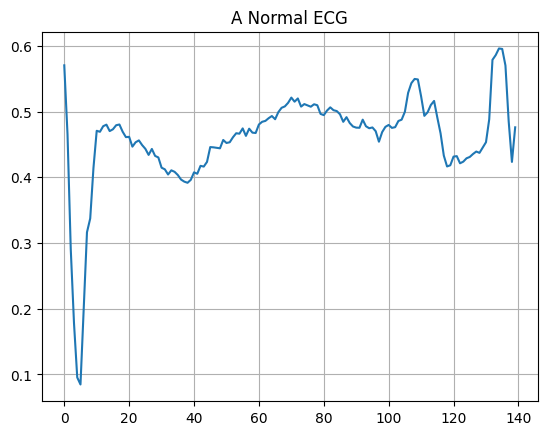

In [5]:
plt.grid()
plt.plot(np.arange(140), Xn_train[0])
plt.title("A Normal ECG")
plt.show()

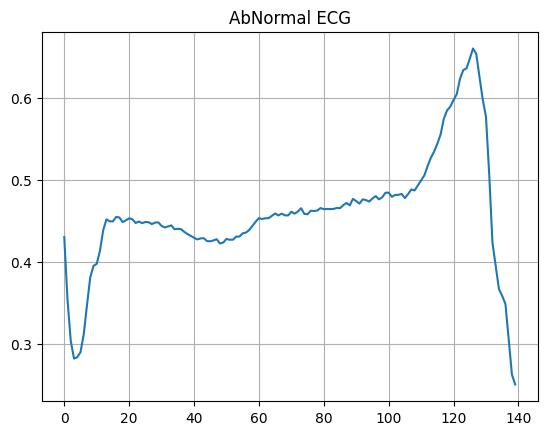

In [6]:
plt.grid()
plt.plot(np.arange(140), Xa_train[0])
plt.title("AbNormal ECG")
plt.show()

3+3

In [7]:
class AnomalyDetector1(Model):
  def __init__(self):
    super(AnomalyDetector1, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(1, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder1 = AnomalyDetector1()

autoencoder1.compile(optimizer='adam', loss='mae')

history1 = autoencoder1.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions1 = autoencoder1.predict(Xn_train)
train_loss1 = tf.keras.losses.mse(reconstructions1, Xn_train)

reconstructions11 = autoencoder1.predict(Xn_test)
test_loss1 = tf.keras.losses.mse(reconstructions11, Xn_test)

print(np.mean(train_loss1))
print(np.mean(test_loss1))


Epoch 1/20
5/5 [==============================] - 1s 55ms/step - loss: 0.0580 - val_loss: 0.0538
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0562 - val_loss: 0.0521
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0535 - val_loss: 0.0502
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0497 - val_loss: 0.0482
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0455 - val_loss: 0.0456
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0409 - val_loss: 0.0430
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0367 - val_loss: 0.0412
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0331 - val_loss: 0.0395
Epoch 9/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0298 - val_loss: 0.0379
Epoch 10/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0271 - val_loss: 0.0368
Epoch 11/20
5/5 [============

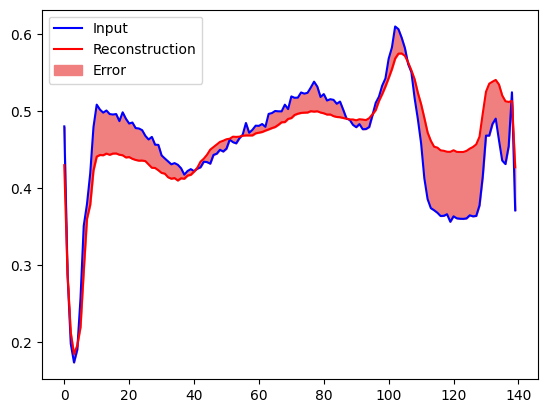

In [8]:
encoded_data = autoencoder1.encoder(Xn_test).numpy()
decoded_data = autoencoder1.decoder(encoded_data).numpy()

plt.plot(Xn_test[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], Xn_test[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

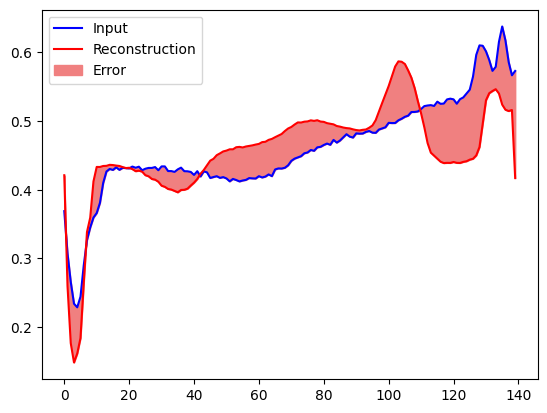

In [9]:
encoded_data = autoencoder1.encoder(Xa_test).numpy()
decoded_data = autoencoder1.decoder(encoded_data).numpy()

plt.plot(Xa_test[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], Xa_test[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 1ms/step


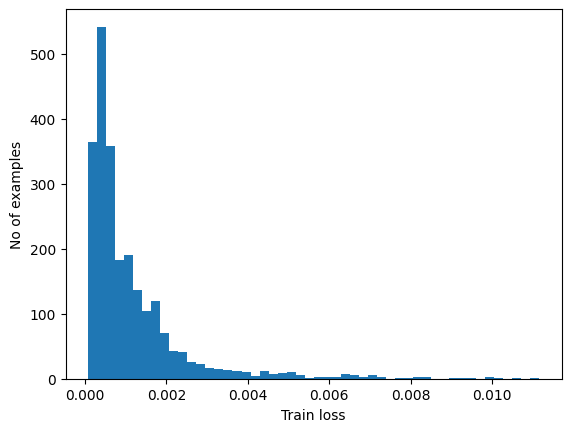

In [10]:
reconstructions = autoencoder1.predict(Xn_train)
train_loss = tf.keras.losses.mse(reconstructions, Xn_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

threshold = np.mean(train_loss) + np.std(train_loss)

14/14 [==============================] - 0s 2ms/step


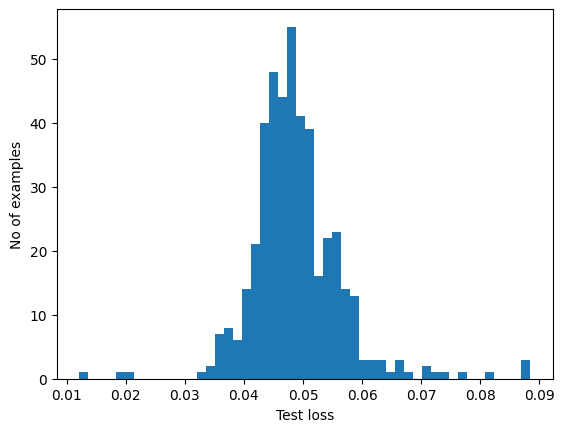

21.484287


In [11]:
reconstructions = autoencoder1.predict(Xa_test)
test_loss = tf.keras.losses.mae(reconstructions, Xa_test)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

sum = np.sum(test_loss)
print(sum)

4+4

In [12]:
class AnomalyDetector2(Model):
  def __init__(self):
    super(AnomalyDetector2, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder2 = AnomalyDetector2()

autoencoder2.compile(optimizer='adam', loss='mae')

history2 = autoencoder2.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions2 = autoencoder2.predict(Xn_train)
train_loss2 = tf.keras.losses.mse(reconstructions2, Xn_train)

reconstructions22 = autoencoder2.predict(Xn_test)
test_loss2 = tf.keras.losses.mse(reconstructions22, Xn_test)

print(np.mean(train_loss2))
print(np.mean(test_loss2))

Epoch 1/20
5/5 [==============================] - 1s 34ms/step - loss: 0.0580 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0567 - val_loss: 0.0525
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0554 - val_loss: 0.0513
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0537 - val_loss: 0.0499
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0516 - val_loss: 0.0482
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0488 - val_loss: 0.0463
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0454 - val_loss: 0.0446
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0415 - val_loss: 0.0439
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0381 - val_loss: 0.0436
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0353 - val_loss: 0.0412
Epoch 11/20
5/5 [============

64+32+16+8+4

In [13]:
class AnomalyDetector3(Model):
  def __init__(self):
    super(AnomalyDetector3, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder3 = AnomalyDetector3()

autoencoder3.compile(optimizer='adam', loss='mae')

history3 = autoencoder3.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions3 = autoencoder3.predict(Xn_train)
train_loss3 = tf.keras.losses.mse(reconstructions3, Xn_train)

reconstructions33 = autoencoder3.predict(Xn_test)
test_loss3 = tf.keras.losses.mse(reconstructions33, Xn_test)

print(np.mean(train_loss3))
print(np.mean(test_loss3))

Epoch 1/20
5/5 [==============================] - 1s 41ms/step - loss: 0.0574 - val_loss: 0.0522
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0534 - val_loss: 0.0492
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0468 - val_loss: 0.0474
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0406 - val_loss: 0.0433
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0355 - val_loss: 0.0416
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0319 - val_loss: 0.0395
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0291 - val_loss: 0.0383
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0273 - val_loss: 0.0375
Epoch 9/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0260 - val_loss: 0.0364
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0249 - val_loss: 0.0356
Epoch 11/20
5/5 [============

64+16+4

In [27]:
from keras import regularizers

class AnomalyDetector4(Model):
  def __init__(self):
    super(AnomalyDetector4, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(16, activation="relu" ),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([      
      layers.Dense(16, activation="relu"),      
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder4 = AnomalyDetector4()

autoencoder4.compile(optimizer='adam', loss='mae')

history4 = autoencoder4.fit(X_train, X_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions4 = autoencoder4.predict(X_train)
train_loss4 = tf.keras.losses.mse(reconstructions4, X_train)

reconstructions44 = autoencoder4.predict(X_test)
test_loss4 = tf.keras.losses.mse(reconstructions44, X_test)

print(np.mean(train_loss4))
print(np.mean(test_loss4))

Epoch 1/20
8/8 [==============================] - 1s 22ms/step - loss: 0.0595 - val_loss: 0.0528
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0505 - val_loss: 0.0474
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0450 - val_loss: 0.0421
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0399 - val_loss: 0.0379
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0361 - val_loss: 0.0350
Epoch 6/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0336 - val_loss: 0.0329
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0316 - val_loss: 0.0310
Epoch 8/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.0294
Epoch 9/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0283 - val_loss: 0.0281
Epoch 10/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0272 - val_loss: 0.0270
Epoch 11/20
8/8 [===============

In [15]:
64+32+8

104

In [30]:
from keras import regularizers

class AnomalyDetector5(Model):
  def __init__(self):
    super(AnomalyDetector5, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),  
      layers.Dense(32, activation="relu"),    
      layers.Dense(8, activation="relu",kernel_regularizer=regularizers.L1(10))]) 

    self.decoder = tf.keras.Sequential([       
      layers.Dense(32, activation="relu"),           
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder5 = AnomalyDetector5()

autoencoder5.compile(optimizer='adam', loss='mae')

history5 = autoencoder5.fit(X_train, X_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions5 = autoencoder5.predict(X_train)
train_loss5 = tf.keras.losses.mse(reconstructions5, X_train)

reconstructions55 = autoencoder5.predict(X_test)
test_loss5 = tf.keras.losses.mse(reconstructions55, X_test)

print(np.mean(train_loss5))
print(np.mean(test_loss5))

Epoch 1/20
8/8 [==============================] - 1s 28ms/step - loss: 15.6791 - val_loss: 2.4298
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 1.4311 - val_loss: 0.6290
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.2046 - val_loss: 0.0556
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0571 - val_loss: 0.0489
Epoch 5/20
8/8 [==============================] - 0s 14ms/step - loss: 0.0454 - val_loss: 0.0430
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0411 - val_loss: 0.0403
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0386 - val_loss: 0.0382
Epoch 8/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0370 - val_loss: 0.0368
Epoch 9/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.0357
Epoch 10/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0347 - val_loss: 0.0348
Epoch 11/20
8/8 [=================

64+16+8+4

In [17]:
class AnomalyDetector6(Model):
  def __init__(self):
    super(AnomalyDetector6, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),      
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder6 = AnomalyDetector6()

autoencoder6.compile(optimizer='adam', loss='mae')

history6 = autoencoder6.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions6 = autoencoder6.predict(Xn_train)
train_loss6 = tf.keras.losses.mse(reconstructions6, Xn_train)

reconstructions66 = autoencoder6.predict(Xn_test)
test_loss6 = tf.keras.losses.mse(reconstructions66, Xn_test)

print(np.mean(train_loss6))
print(np.mean(test_loss6))

Epoch 1/20
5/5 [==============================] - 1s 46ms/step - loss: 0.0571 - val_loss: 0.0520
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0532 - val_loss: 0.0494
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0483 - val_loss: 0.0467
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0433 - val_loss: 0.0439
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0385 - val_loss: 0.0421
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0345 - val_loss: 0.0408
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0314 - val_loss: 0.0397
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0291 - val_loss: 0.0383
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0272 - val_loss: 0.0371
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0259 - val_loss: 0.0361
Epoch 11/20
5/5 [=============

In [18]:
64+32+8+4

108

In [19]:
class AnomalyDetector7(Model):
  def __init__(self):
    super(AnomalyDetector7, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),      
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),      
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder7 = AnomalyDetector7()

autoencoder7.compile(optimizer='adam', loss='mae')

history7 = autoencoder7.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions7 = autoencoder7.predict(Xn_train)
train_loss7 = tf.keras.losses.mse(reconstructions7, Xn_train)

reconstructions77 = autoencoder7.predict(Xn_test)
test_loss7 = tf.keras.losses.mse(reconstructions77, Xn_test)

print(np.mean(train_loss7))
print(np.mean(test_loss7))

Epoch 1/20
5/5 [==============================] - 1s 39ms/step - loss: 0.0578 - val_loss: 0.0531
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0545 - val_loss: 0.0519
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0497 - val_loss: 0.0485
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0442 - val_loss: 0.0462
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0388 - val_loss: 0.0428
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0346 - val_loss: 0.0412
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0318 - val_loss: 0.0396
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0300 - val_loss: 0.0385
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0283 - val_loss: 0.0376
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0266 - val_loss: 0.0365
Epoch 11/20
5/5 [============

64+32+16+8+4+2

In [20]:
class AnomalyDetector8(Model):
  def __init__(self):
    super(AnomalyDetector8, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu"),
      layers.Dense(2, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(4, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder8 = AnomalyDetector8()

autoencoder8.compile(optimizer='adam', loss='mae')

history8 = autoencoder8.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions8 = autoencoder8.predict(Xn_train)
train_loss8 = tf.keras.losses.mse(reconstructions8, Xn_train)

reconstructions88 = autoencoder8.predict(Xn_test)
test_loss8 = tf.keras.losses.mae(reconstructions88, Xn_test)

print(np.mean(train_loss8))
print(np.mean(test_loss8))

Epoch 1/20
5/5 [==============================] - 2s 41ms/step - loss: 0.0577 - val_loss: 0.0529
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0551 - val_loss: 0.0501
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0503 - val_loss: 0.0474
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0444 - val_loss: 0.0459
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0387 - val_loss: 0.0422
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0341 - val_loss: 0.0411
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0308 - val_loss: 0.0392
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0387
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0272 - val_loss: 0.0375
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0261 - val_loss: 0.0370
Epoch 11/20
5/5 [=============

In [21]:
class AnomalyDetector9(Model):
  def __init__(self):
    super(AnomalyDetector9, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="linear")]) 

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),      
      layers.Dense(64, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder9 = AnomalyDetector9()

autoencoder9.compile(optimizer='adam', loss='mae')

history9 = autoencoder9.fit(Xn_train, Xn_train, 
          epochs=20, 
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)

reconstructions9 = autoencoder9.predict(Xn_train)
train_loss9 = tf.keras.losses.mse(reconstructions9, Xn_train)

reconstructions99 = autoencoder9.predict(Xn_test)
test_loss9 = tf.keras.losses.mse(reconstructions99, Xn_test)

print(np.mean(train_loss9))
print(np.mean(test_loss9))

Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 0.0581 - val_loss: 0.0534
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0562 - val_loss: 0.0513
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0527 - val_loss: 0.0489
Epoch 4/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0473 - val_loss: 0.0470
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0416 - val_loss: 0.0442
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0364 - val_loss: 0.0416
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0320 - val_loss: 0.0400
Epoch 8/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0290 - val_loss: 0.0383
Epoch 9/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0270 - val_loss: 0.0373
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0257 - val_loss: 0.0363
Epoch 11/20
5/5 [============